In [18]:
# import the libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

df_path = '/content/drive/MyDrive/AmazonData'

In [6]:
#Importing the InceptionV3
#include_top=False means don't use the first and the last layer
inception = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
# layer.trainable = False do not train the existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/AmazonData/*')

In [9]:
#number of classes
folders

['/content/drive/MyDrive/AmazonData/Saree',
 '/content/drive/MyDrive/AmazonData/Jeans',
 '/content/drive/MyDrive/AmazonData/Trousers']

In [10]:
x=Flatten()(inception.output)

In [11]:
#if you have two catagories you can use sigmoid if you have multiple catagory then go with softmax
precision=Dense(units=len(folders),activation='softmax')(x)

In [12]:
#creating the model object
model=Model(inputs=inception.input,outputs=precision)

In [13]:
#View the stucture of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
#cost and optimization method to user for the model
model.compile(
    loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

df_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [16]:
# \provide the same target size as initialied for the image size
df_set = df_datagen.flow_from_directory('/content/drive/MyDrive/AmazonData',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 463 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  df_set,
  epochs=10
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
29/29 [==============================] - 135s 4s/step - loss: 5.0987 - accuracy: 0.7430
Epoch 2/10
29/29 [==============================] - 49s 2s/step - loss: 1.7749 - accuracy: 0.8683
Epoch 3/10
29/29 [==============================] - 49s 2s/step - loss: 1.1481 - accuracy: 0.8920
Epoch 4/10
29/29 [==============================] - 49s 2s/step - loss: 0.7246 - accuracy: 0.9179
Epoch 5/10
29/29 [==============================] - 50s 2s/step - loss: 1.1902 - accuracy: 0.8683
Epoch 6/10
29/29 [==============================] - 50s 2s/step - loss: 1.0820 - accuracy: 0.8963
Epoch 7/10
29/29 [==============================] - 50s 2s/step - loss: 0.6900 - accuracy: 0.9309
Epoch 8/10
29/29 [==============================] - 50s 2s/step - loss: 0.6858 - accuracy: 0.9222
Epoch 9/10
29/29 [==============================] - 49s 2s/step - loss: 0.6906 - accuracy: 0.9266
Epoch 10/10
29/29 [==============================] - 49s 2s/step - loss: 0.2096 - accuracy: 0.9719


In [19]:
import matplotlib.pyplot as plt

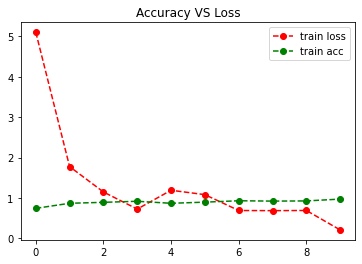

In [20]:
# plot the loss
plt.plot(r.history['loss'],'go--',c='red', label='train loss')
plt.plot(r.history['accuracy'],'go--', label='train acc')
plt.legend()
plt.title('Accuracy VS Loss')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the image is of a Trousers


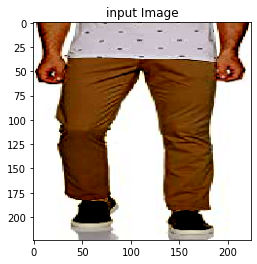

In [28]:
#Validate our image
path='/content/drive/MyDrive/AmazonData/Trousers/Trousers104.jpg'
img=image.load_img(path,target_size=(224,224))

i=img_to_array(img)

i=preprocess_input(i)

input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred == 0:
  print("the image is of a jeans")
elif pred == 1:
  print("the image is of a Saree")
else:
  print("the image is of a Trousers")

#To Display the image
plt.imshow(input_arr[0])
plt.title("input Image")
plt.axis=False
plt.show()



In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('ModelImage_classification.h5')